# Smile Detection

My intentions for this notebook is to use it as a starting point for future computer vision projects.  

In fact, the purpose of this notebook isn't to use 10 lines of code to get some good results. Simply throwing blindly images to a convNet and get 90% accuracy. What I want to do is really understand the data, understand the model and avoir making mistakes.   

If you are looking for an interesting read, I suggest to look at [this link](https://karpathy.github.io/2019/04/25/recipe/).

# Get to know the data

The goal wil be to classify images for detecting if the person is smiling or not (binary classification).  

The data comes from LFWcrop and is available [here](http://conradsanderson.id.au/lfwcrop/).

Lets take a look at them.

In [40]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Lambda, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

In [41]:
import os

smile_names = os.listdir('./SMILE_Dataset/train/smile')
non_smile_names = os.listdir('./SMILE_Dataset/train/no_smile')

In [ ]:
for i in range(10):
    train = dummy[0+i*10:20+i*10]

In [14]:
from sklearn.model_selection import StratifiedKFold

def load_data():
    # load your data using this function

def create model():
    # create your model using this function
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Feed to a densily connected layer for prediction
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])

    return model
   
def train_and_evaluate__model(model, data_train, labels_train, data_test, labels_test):
    model.fit...
    # fit and evaluate here.

IndentationError: expected an indented block (<ipython-input-14-97655bbf667f>, line 6)

In [ ]:
n_folds = 10
data, labels, header_info = load_data()
skf = StratifiedKFold(labels, n_folds=n_folds, shuffle=True)

for i, (train, test) in enumerate(skf):
        print "Running Fold", i+1, "/", n_folds
        model = None # Clearing the NN.
        model = create_model()
        train_and_evaluate_model(model, data[train], labels[train], data[test], labels[test])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state = 10)

In [15]:
200/10

20.0

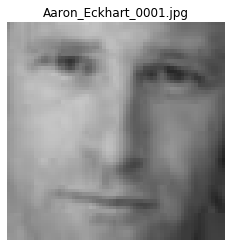

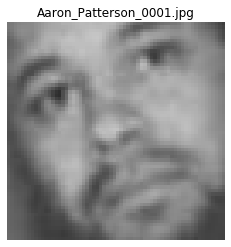

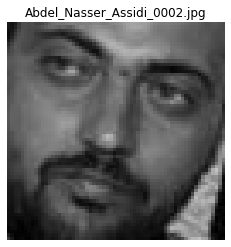

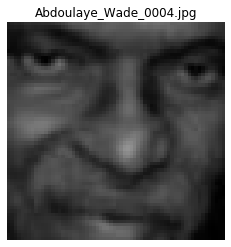

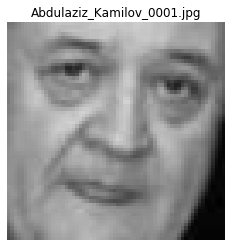

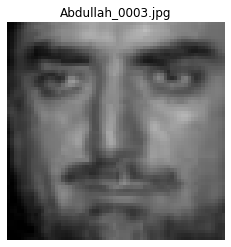

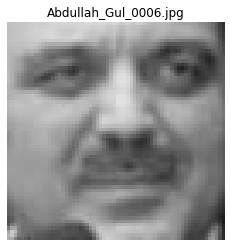

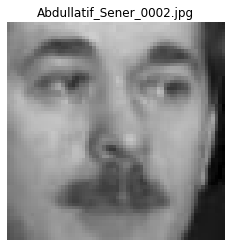

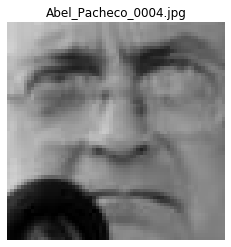

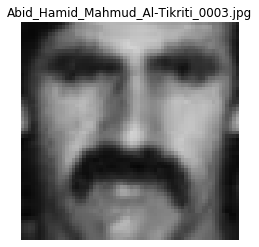

In [3]:
import time

for i in range(10):
    
    img = image.load_img('images/training/non_smile/' + non_smile_names[i], target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.

    plt.imshow(x[0])                           
    plt.axis('off')
    plt.title(non_smile_names[i])
    plt.show()


One thing that I notice here, is that the faces are croped from the background. And what seems to define a smile is if we see teeths. That means that someone who is surprised and has the mouth open with the shape of an 'O' would probably be classified as smiling. 

Furthermore, here we need very localized features maps, as we don't need filters for the context of the image. 

The next step is going to build a very simplistic toy example to see if I can look at my network and wrong predictions and understand where they might be coming from.

In addition, this will allow us to have a full training + evaluation skeleton.

- Fix a random seed
- Keep it simple

In [18]:
#overfit one batch.

In [45]:
training_dir = 'SMILE_Dataset/train/'
testing_dir = 'SMILE_Dataset/test/'

#smile_names = os.listdir('./SMILE_Dataset/train/smile')
#non_smile_names = os.listdir('./SMILE_Dataset/train/no_smile')

print('Training: there are {} of smiling images and {} non smiling images.'.format(len(os.listdir('SMILE_Dataset/train/smile')),len(os.listdir('SMILE_Dataset/train/no_smile'))))
print('Testing: there are {} of smiling images and {} non smiling images.'.format(len(os.listdir('SMILE_Dataset/test/smile')),len(os.listdir('SMILE_Dataset/test/no_smile'))))

Training: there are 160 of smiling images and 160 non smiling images.
Testing: there are 40 of smiling images and 40 non smiling images.


In [46]:
from keras import models
from keras import layers

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Feed to a densily connected layer for prediction
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [81]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [50]:
from keras.preprocessing.image import ImageDataGenerator

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary')

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [52]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=test_generator,
    validation_steps=50)


Epoch 1/30
100/100 [==============================] - 16s 159ms/step - loss: 0.3209 - acc: 0.8805 - val_loss: 0.2681 - val_acc: 0.9010
Epoch 2/30
100/100 [==============================] - 14s 139ms/step - loss: 0.1172 - acc: 0.9575 - val_loss: 0.1521 - val_acc: 0.9500
Epoch 3/30
100/100 [==============================] - 14s 138ms/step - loss: 0.0851 - acc: 0.9690 - val_loss: 0.1485 - val_acc: 0.9390
Epoch 4/30
100/100 [==============================] - 14s 138ms/step - loss: 0.0655 - acc: 0.9805 - val_loss: 0.1746 - val_acc: 0.9360
Epoch 5/30
100/100 [==============================] - 14s 138ms/step - loss: 0.0501 - acc: 0.9840 - val_loss: 0.2317 - val_acc: 0.9370
Epoch 6/30
100/100 [==============================] - 14s 139ms/step - loss: 0.0336 - acc: 0.9910 - val_loss: 0.1059 - val_acc: 0.9120
Epoch 7/30
100/100 [==============================] - 14s 142ms/step - loss: 0.0242 - acc: 0.9935 - val_loss: 0.4300 - val_acc: 0.9130
Epoch 8/30
 25/100 [======>.......................] - 

KeyboardInterrupt: 

In [68]:
# Good practice to save the model after training!

model.save('smile-detection.h5')

Wow, we reached ~ 96% ! This is even better than using transfer learning.

Lets quickly try with image augmentation.

In [87]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  width_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary')

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [92]:
# online archi
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Feed to a densily connected layer for prediction
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [84]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Feed to a densily connected layer for prediction
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [97]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

In [98]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
             metrics=['acc'])

In [99]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=50,
    validation_data=test_generator,
    validation_steps=50,
    callbacks=[learning_rate_reduction])

Epoch 1/50
20/20 [==============================] - 8s 396ms/step - loss: 0.9161 - acc: 0.8050 - val_loss: 0.1264 - val_acc: 0.9250
Epoch 2/50
20/20 [==============================] - 6s 318ms/step - loss: 0.1906 - acc: 0.9375 - val_loss: 0.2278 - val_acc: 0.8880
Epoch 3/50
20/20 [==============================] - 8s 377ms/step - loss: 0.2358 - acc: 0.9025 - val_loss: 0.2710 - val_acc: 0.8750
Epoch 4/50
20/20 [==============================] - 7s 336ms/step - loss: 0.1466 - acc: 0.9475 - val_loss: 0.2854 - val_acc: 0.8750

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/50
20/20 [==============================] - 7s 341ms/step - loss: 0.1117 - acc: 0.9500 - val_loss: 0.0566 - val_acc: 0.9380
Epoch 6/50
20/20 [==============================] - 7s 357ms/step - loss: 0.1165 - acc: 0.9600 - val_loss: 0.7828 - val_acc: 0.8370
Epoch 7/50
20/20 [==============================] - 6s 314ms/step - loss: 0.0981 - acc: 0.9725 - val_loss: 0.0993 - val_acc: 0.

In [79]:
model.save('smile-detection-97.h5')

Training was slow. A recent advancement in convnets are the use of depth convolutions which speend up training. This is the basis of the xception architecture that won in 2015.

In [50]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [55]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=test_generator,
    validation_steps=50)

Epoch 1/20
25/25 [==============================] - 8s 315ms/step - loss: 0.0849 - acc: 0.9800 - val_loss: 0.0432 - val_acc: 0.9850
Epoch 2/20
25/25 [==============================] - 8s 318ms/step - loss: 0.0908 - acc: 0.9700 - val_loss: 0.3055 - val_acc: 0.9850
Epoch 3/20
25/25 [==============================] - 8s 315ms/step - loss: 0.0884 - acc: 0.9700 - val_loss: 0.1836 - val_acc: 0.9850
Epoch 4/20
25/25 [==============================] - 8s 308ms/step - loss: 0.1069 - acc: 0.9680 - val_loss: 0.0205 - val_acc: 0.9800
Epoch 5/20
25/25 [==============================] - 8s 330ms/step - loss: 0.0856 - acc: 0.9620 - val_loss: 0.0783 - val_acc: 0.9800
Epoch 6/20
25/25 [==============================] - 8s 324ms/step - loss: 0.0764 - acc: 0.9720 - val_loss: 0.0326 - val_acc: 0.9900
Epoch 7/20
25/25 [==============================] - 7s 296ms/step - loss: 0.1078 - acc: 0.9600 - val_loss: 0.0140 - val_acc: 0.9850
Epoch 8/20
25/25 [==============================] - 7s 297ms/step - loss: 0.

In [95]:
model.save('smile-detection-91.h5')

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')